# Написание функций. Метод k ближайших соседей.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as scist
import seaborn as sns
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Загрузим тренировочный датасет Breast cancer wisconsin (diagnostic) dataset 
#из sklearn.datasets для решения задачи классификации методом k ближайших соседей (kNN)

from sklearn import datasets  
X, y = datasets.load_breast_cancer(return_X_y=True) 

In [3]:
#1 разделим на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 12 )

1) Исследуем  зависимость ошибок на обучающей и тестовой выборках в методе k ближайших соседей в зависимости от k. Число k нужно взять от 1 до максимально возможного. 

2) Построим на одном рисунке графики зависимости ошибки на обучающей / тестовой выборках в зависимости от числа соседей k. Определите оптимальное значение k, когда ошибка на тестовой выборке минимальна, отобразите эту точку на графике. Дополнительно проведем пунктирную прямую, соответствующую ошибке наивного байесовского классификатора на тестовой выборке.

3) Сделаем выводы о поведении ошибок в зависимости от k.

4) Обучим классификатор kNN с оптимальным значением k и вычислите остальные метрики качества этого классификатора (accuracy, f1_score, постройте ROC-кривую и вычислите площадь AUC под этой кривой).

In [4]:
# функ. для вычисления ошибки
def calc_of_erro (x, y):
    n = len(x)
    summ = 0
    for i in range (0,n):
        if x[i]==y[i]:
            summ += 0
        else:
            summ += 1
    R = summ/n
    
    return R

In [5]:
#Для k-соседей

def err_on_samples (k):
   
    #задание модели
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #обучение модели на обучающей выборке
    knn.fit(x_train, y_train)

    y_train_predict = knn.predict(x_train)
    y_test_predict = knn.predict(x_test)

    r_train = calc_of_erro (list(y_train_predict), list(y_train))
    r_test = calc_of_erro (list(y_test_predict), list(y_test))
    
    return r_train, r_test

In [6]:
list_of_train = []
list_of_test = []
k = [i for i in range (1, len(x_train)-1)]

for i in range (0, len(k) ):
    train, test = err_on_samples (k[i])
    list_of_train.append(train)
    list_of_test.append(test)
    if test == min(list_of_test):
        k_optim = k[i]

In [7]:
#для байесовского классификатора
#задание модели
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB ()

#обучение модели на обучающей выборке
nbc.fit(x_train, y_train)

y_predict_test_NB = nbc.predict(x_test)

r_test_NB = calc_of_erro(list(y_predict_test_NB),list(y_test))

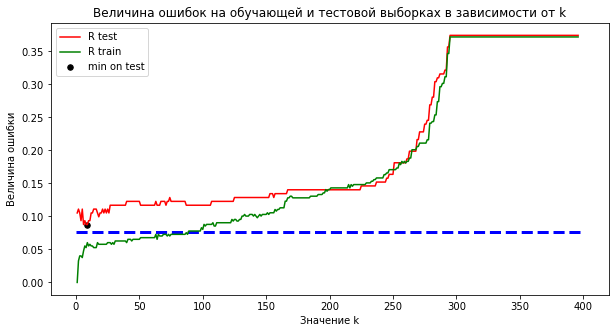

Oптимальное значение k = 9


In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(k, list_of_test, 'r', markersize = 5,  label="R test")
ax.plot(k, list_of_train, 'g', markersize = 5, label="R train")

min_err = min(list_of_test)
plt.scatter(k_optim, min_err, color='k', s=30, marker='o', label="min on test")

ax.hlines(r_test_NB, 0, 400, color = 'b', linewidth = 3, linestyle = '--')


ax.set_title('Величина ошибок на обучающей и тестовой выборках в зависимости от k')
ax.set_xlabel ('Значение k', fontsize = 10)
ax.set_ylabel ('Величина ошибки', fontsize = 10)
plt.legend()
plt.show()

print('Oптимальное значение k =', k_optim)

__Вывод:__ 
1. На графике мы можем видеть, что с возрастанием k, возрастает и ошибка как на тестовой, так и на обучающей выборке. 
2. Если k ближайших соседей становится равно половине обучающей выборки, величина ошибки на тестовой выборке становится равна величине ошибки на обучающей. И далее, при увеличении значения k, ошибка на обучающей выборке становится больше ошибки на тестовой. 
3. Когда величина k достигла около 3/4 обучающей выборки, показатели ошибок на обучающей и на тестовой выборках сравнялись и вышли на плато.